In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.manifold import TSNE
import seaborn as sns

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_glcm_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_glcm_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))

In [ ]:
df_glcm_z

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,filename,label
0,-0.117970,-0.265037,0.573895,1.615441,0.261439,1.623821,callo_1.png,smaller
1,-0.689035,-0.862073,1.111661,1.826963,-0.049338,1.866511,callo_10.png,smaller
2,0.723027,0.707483,-0.528180,-0.424014,-0.919636,-0.447924,callo_100.png,smaller
3,0.125226,0.337029,-0.517080,-0.809188,-0.678186,-0.788491,callo_101.png,smaller
4,1.304987,1.643435,-1.718236,-0.716244,-1.826587,-0.709481,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,-0.277401,-0.521728,0.875899,0.606081,0.546989,0.543134,callo_95.png,higher
533,0.083434,-0.523298,1.088512,-0.232107,0.255967,-0.272234,callo_96.png,higher
534,-0.097836,-0.273793,0.451454,-0.024781,0.459498,-0.076473,callo_97.png,higher
535,-0.449770,-1.003507,1.655792,2.974858,0.716253,3.251952,callo_98.png,higher


In [ ]:
df_glcm_z.isnull().sum()

contrast         0
dissimilarity    0
homogeneity      0
energy           0
correlation      0
ASM              0
filename         0
label            0
dtype: int64

In [ ]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_glcm_z_cl= df_glcm_z.drop(columns=['filename', 'label'])

Se realiza clustering con k-means. Para averiguar cual va a ser el mejor valor de k o clusters se aplica el método
del "codo". También se simularán con diferentes números de clusteres la silueta.

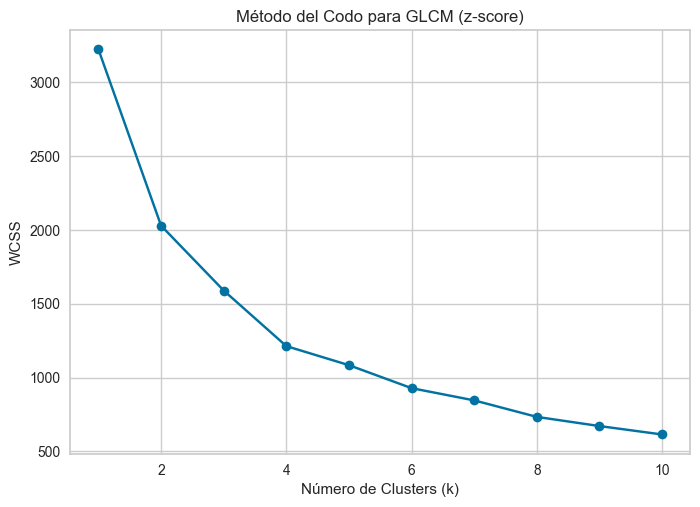

In [ ]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_glcm_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

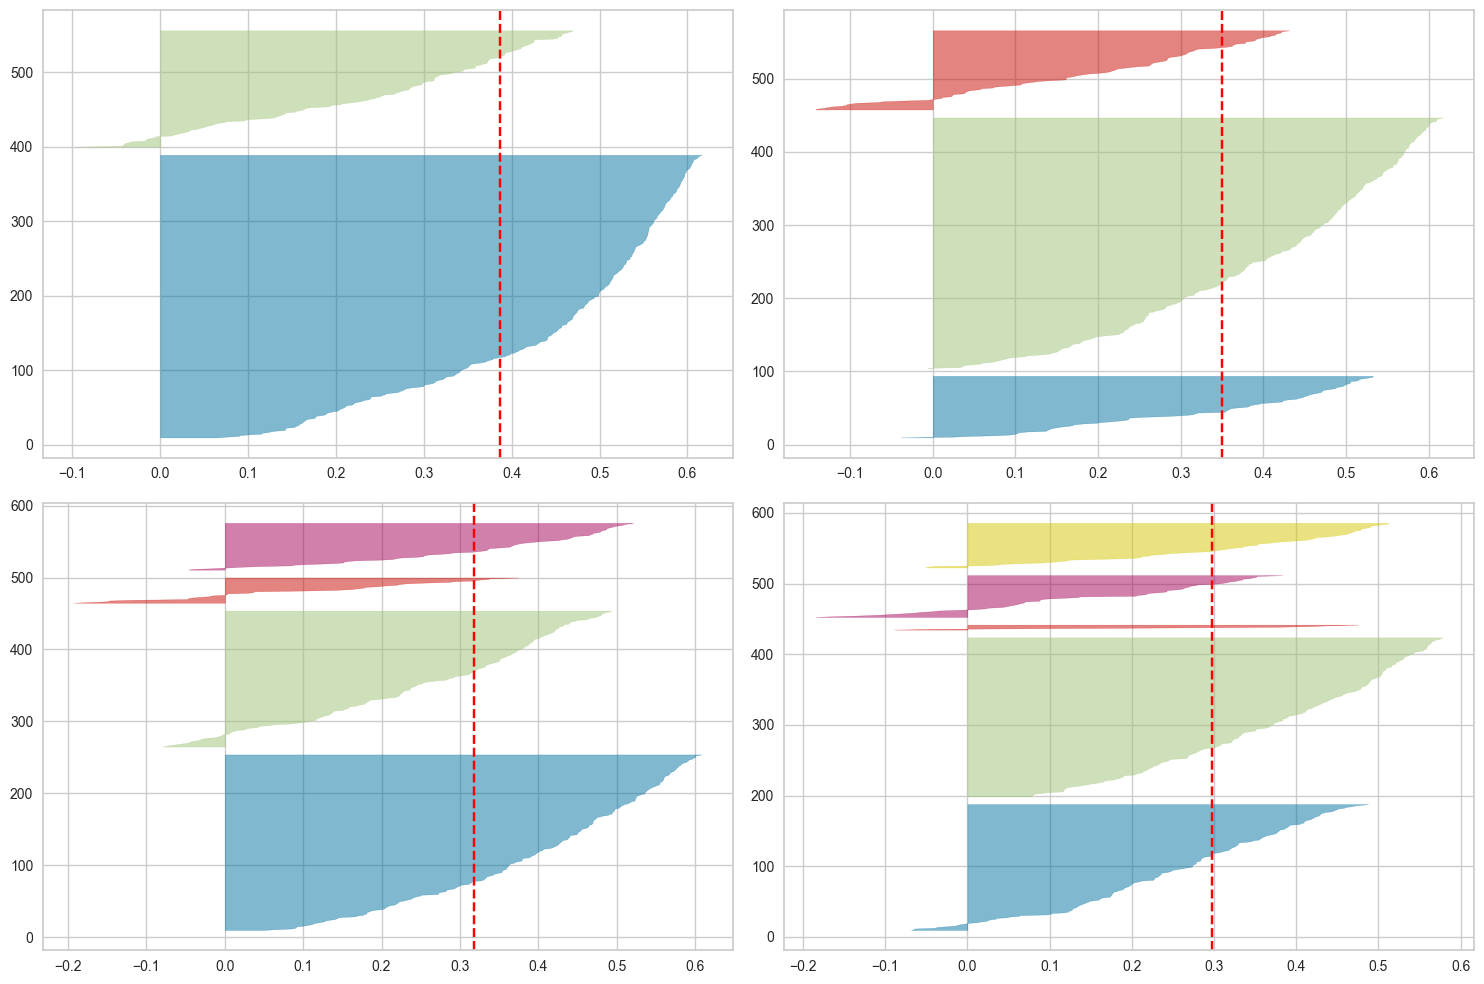

In [ ]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_glcm_z_cl)  

plt.tight_layout()
plt.show()

Aunque se obtiene mejor valor de silueta con dos clusteres, pero se van a probar 3 teniendo en cuenta ambos criterios

In [ ]:
#Modelo k-means
cluster_glcm_z= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_glcm_z.fit(df_glcm_z_cl)   

KMeans(n_clusters=2, random_state=42)

In [ ]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_glcm_z['Cluster'] = cluster_glcm_z.labels_
pd.crosstab(df_glcm_z['Cluster'], df_glcm_z['label'])

label,higher,smaller
Cluster,,
0,246,134
1,22,135


In [ ]:
silhouette_avg_glcm_z = silhouette_score(df_glcm_z_cl, cluster_glcm_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_glcm_z}')

Índice de silueta promedio: 0.3870992787571705


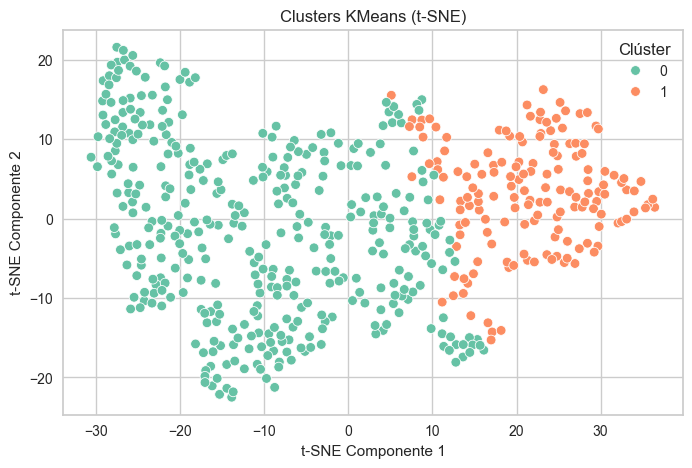

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_glcm_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_glcm_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


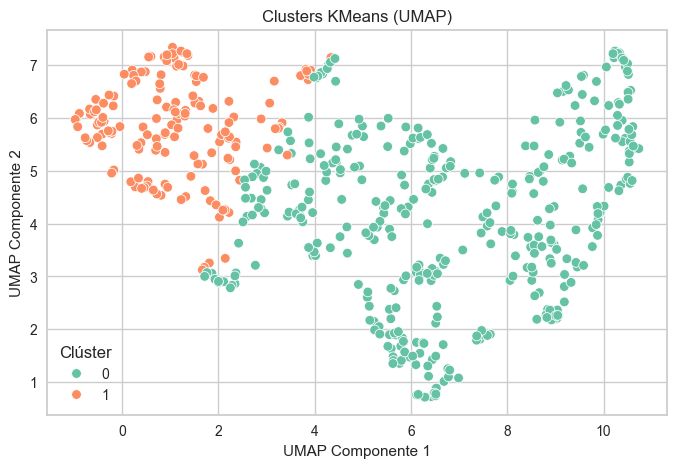

In [ ]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_glcm_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_glcm_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

Ahora se realiza lo mismo pero con la normalización min-max

In [ ]:
df_glcm_mm

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,filename,label
0,0.180035,0.153752,0.849470,0.637627,0.834112,0.524976,callo_1.png,smaller
1,0.108787,0.082758,0.916683,0.660920,0.789212,0.551927,callo_10.png,smaller
2,0.284960,0.269394,0.711725,0.413043,0.663472,0.294907,callo_100.png,smaller
3,0.210377,0.225344,0.713113,0.370628,0.698357,0.257087,callo_101.png,smaller
4,0.357567,0.380689,0.562984,0.380863,0.532437,0.265861,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,0.160144,0.123228,0.887216,0.526477,0.875368,0.404965,callo_95.png,higher
533,0.205163,0.123042,0.913790,0.434176,0.833322,0.314418,callo_96.png,higher
534,0.182547,0.152710,0.834166,0.457007,0.862728,0.336157,callo_97.png,higher
535,0.138639,0.065940,0.984693,0.787326,0.899824,0.705780,callo_98.png,higher


In [ ]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_glcm_mm_cl= df_glcm_mm.drop(columns=['filename', 'label'])

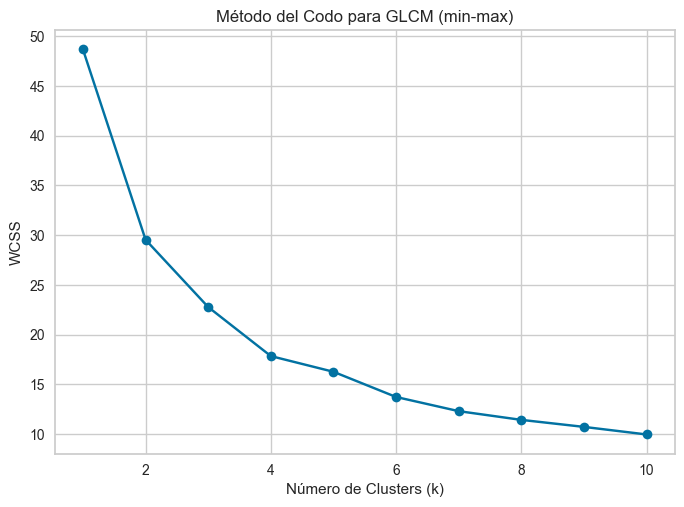

In [ ]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_glcm_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-max)')
plt.grid(True)
plt.show()

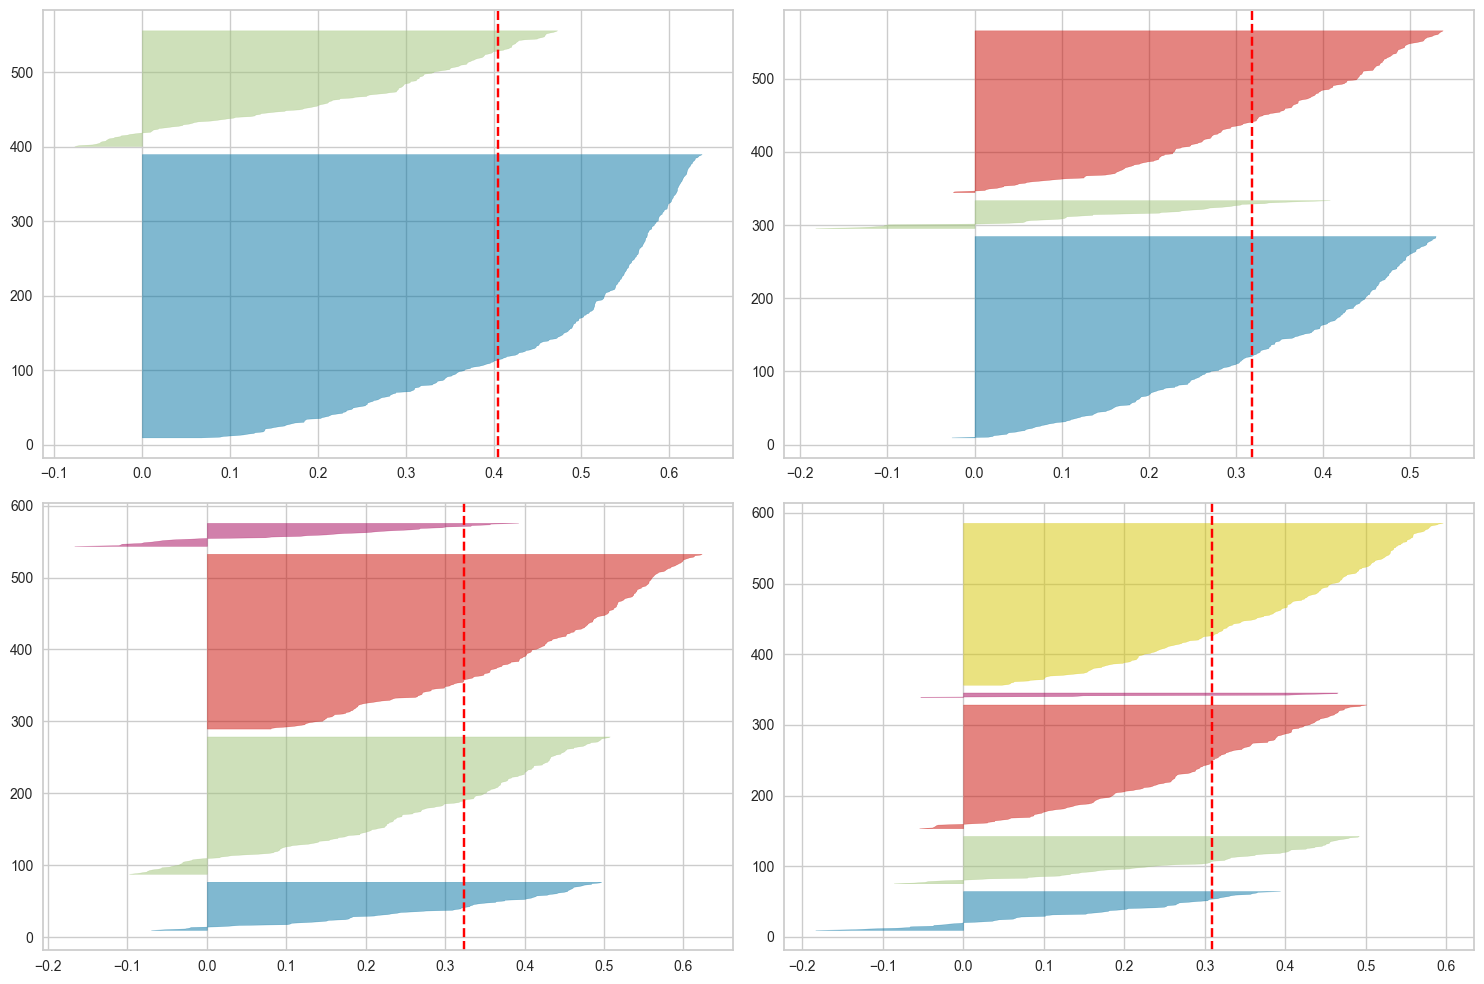

In [ ]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_glcm_mm_cl)  

plt.tight_layout()
plt.show()

In [ ]:
#Modelo k-means
cluster_glcm_mm= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_glcm_mm.fit(df_glcm_mm_cl) 

KMeans(n_clusters=2, random_state=42)

In [ ]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_glcm_mm['Cluster'] = cluster_glcm_mm.labels_
pd.crosstab(df_glcm_mm['Cluster'], df_glcm_mm['label'])

label,higher,smaller
Cluster,,
0,251,148
1,17,121


Pasa lo mismo que antes, en el cluster 0 si que están casi todas las imágenes higher, pero las imágenes smaller se reparten entre el cluster 1 y 0.

In [ ]:
silhouette_avg_glcm_mm = silhouette_score(df_glcm_mm_cl, cluster_glcm_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_glcm_mm}')

Índice de silueta promedio: 0.41940693613261215


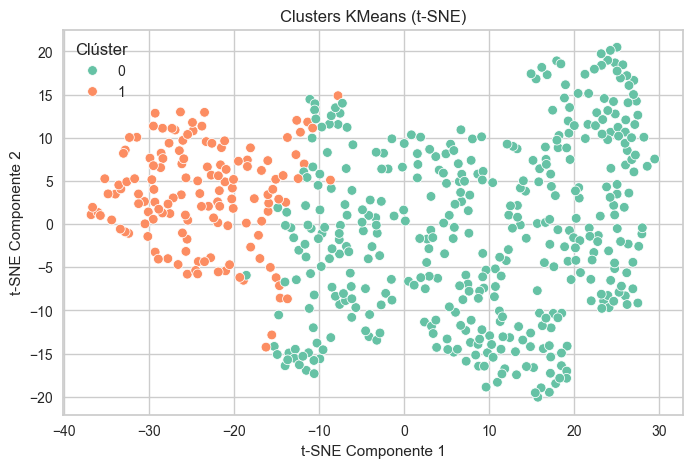

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_glcm_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_glcm_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


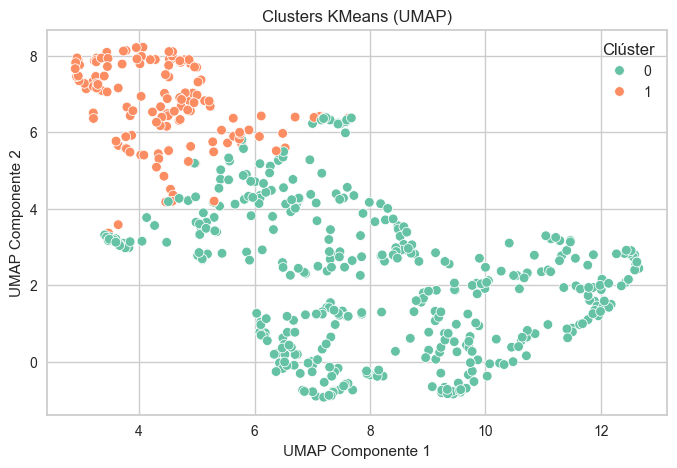

In [ ]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_glcm_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_glcm_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

reduccion de la dimensionalidad umap
primero zscore

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


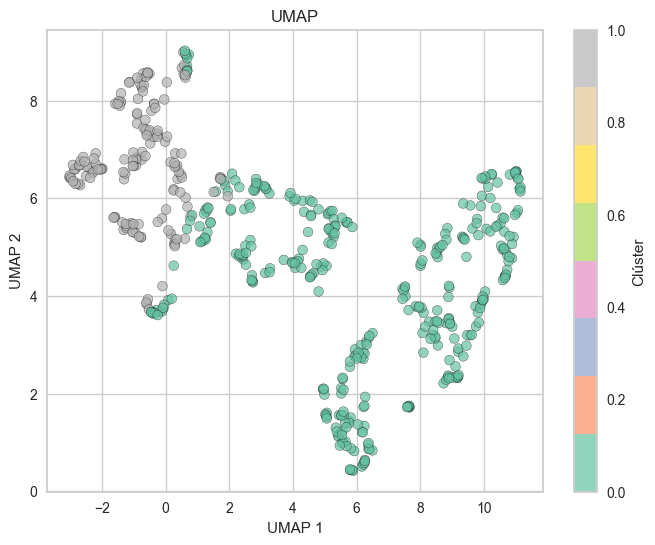

In [ ]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_zscore = umap.UMAP(n_neighbors= 9, n_components=2,min_dist=0.01, random_state=42)  
X_umap_zscore = umap_model_zscore.fit_transform(df_glcm_z_cl)


plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_zscore[:, 0], X_umap_zscore[:, 1],
    c=df_glcm_z['Cluster'], cmap='Set2', edgecolor='k', alpha=0.7
)
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

In [ ]:
#Modelo k-means
cluster_glcm_z_umap= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_glcm_z_umap.fit(X_umap_zscore) 

KMeans(n_clusters=2, random_state=42)

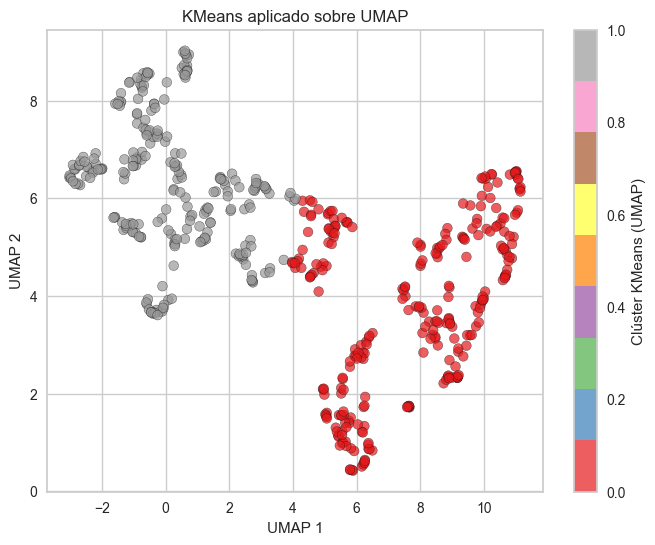

In [ ]:
# Añadir los nuevos clusters al DataFrame original
df_glcm_z['Cluster_UMAP'] = cluster_glcm_z_umap.labels_

# Visualización con los nuevos clústeres
plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_zscore[:, 0], X_umap_zscore[:, 1],
    c=df_glcm_z['Cluster_UMAP'], cmap='Set1', edgecolor='k', alpha=0.7
)
plt.title('KMeans aplicado sobre UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster KMeans (UMAP)')
plt.grid(True)
plt.show()

In [ ]:
pd.crosstab(df_glcm_z['label'], df_glcm_z['Cluster_UMAP'])

Cluster_UMAP,0,1
label,,
higher,206,62
smaller,79,190


In [ ]:
silhouette_umap = silhouette_score(X_umap_zscore, cluster_glcm_z_umap.labels_)
print(f"Índice de silueta (UMAP + KMeans): {silhouette_umap:.3f}")


Índice de silueta (UMAP + KMeans): 0.595


Si se reduce la dimensionalidad con UMAP y después se vuelve a realizar el clustering, ya se puede ver que la mayoría de las imágenes higher están en el cluster 0 y la mayoría de las smaller están en el cluster 1. Además, la separación entre estos clusteres no es tan mala, aunque enla gráfica hay una buena parte de puntos del cluster1 enel 0.

minmax

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


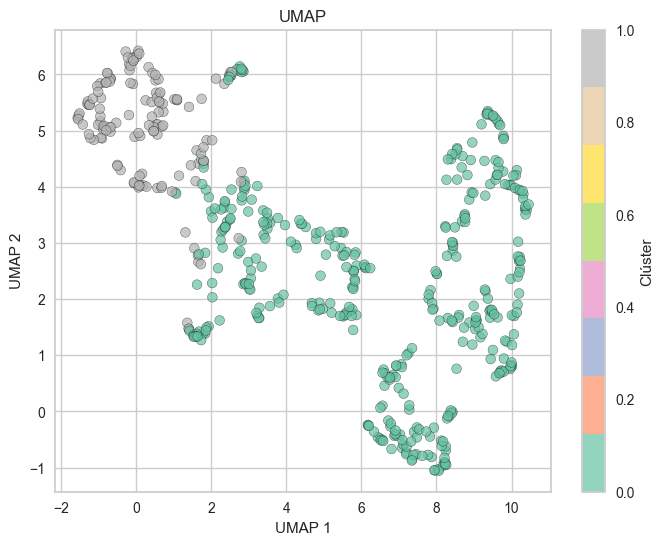

In [29]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 11, n_components=2,min_dist=0.01, random_state=42)  #11
X_umap_mm = umap_model_mm.fit_transform(df_glcm_mm_cl)


plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_mm[:, 0], X_umap_mm[:, 1],
    c=df_glcm_mm['Cluster'], cmap='Set2', edgecolor='k', alpha=0.7
)
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

In [30]:
#Modelo k-means
cluster_glcm_mm_umap= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_glcm_mm_umap.fit(X_umap_mm) 

KMeans(n_clusters=2, random_state=42)

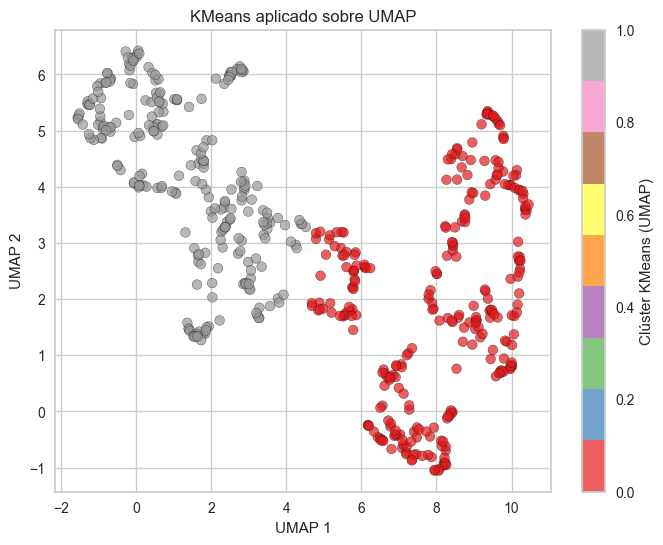

In [31]:
# Añadir los nuevos clusters al DataFrame original
df_glcm_mm['Cluster_UMAP'] = cluster_glcm_mm_umap.labels_

# Visualización con los nuevos clústeres
plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_mm[:, 0], X_umap_mm[:, 1],
    c=df_glcm_mm['Cluster_UMAP'], cmap='Set1', edgecolor='k', alpha=0.7
)
plt.title('KMeans aplicado sobre UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster KMeans (UMAP)')
plt.grid(True)
plt.show()

In [32]:
pd.crosstab(df_glcm_mm['label'], df_glcm_mm['Cluster_UMAP'])

Cluster_UMAP,0,1
label,,
higher,206,62
smaller,79,190


In [33]:
silhouette_umap_mm = silhouette_score(X_umap_mm, cluster_glcm_mm_umap.labels_)
print(f"Índice de silueta (UMAP + KMeans): {silhouette_umap_mm:.3f}")

Índice de silueta (UMAP + KMeans): 0.590


Se obtiene el mismo resultado que con la normalización zscore.
